In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("trainingdata.csv", encoding = 'unicode_escape')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [2]:
# Summary statistics
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [3]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [4]:
df.shape

(614, 13)

In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
#filling null values with their mean med or mode
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode().iloc[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0])

df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0])
df['Married'] = df['Married'].fillna(df['Married'].mode().iloc[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0])

In [5]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

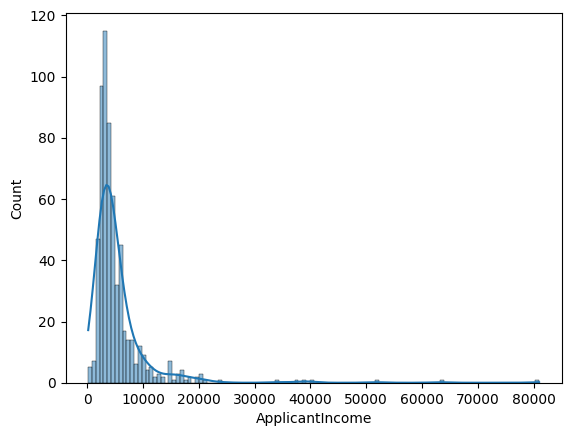

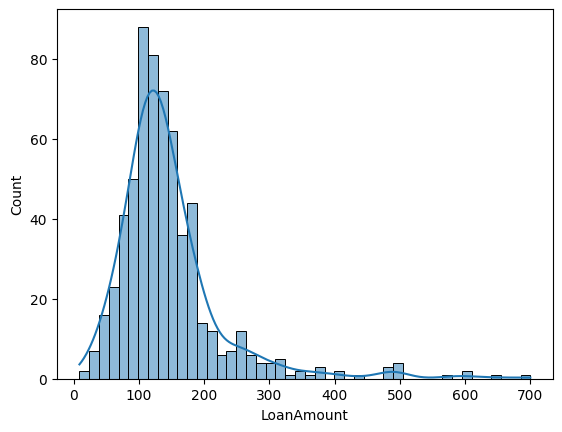

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distributions
sns.histplot(df['ApplicantIncome'], kde=True)
plt.show()

sns.histplot(df['LoanAmount'], kde=True)
plt.show()




<Axes: xlabel='Self_Employed', ylabel='ApplicantIncome'>

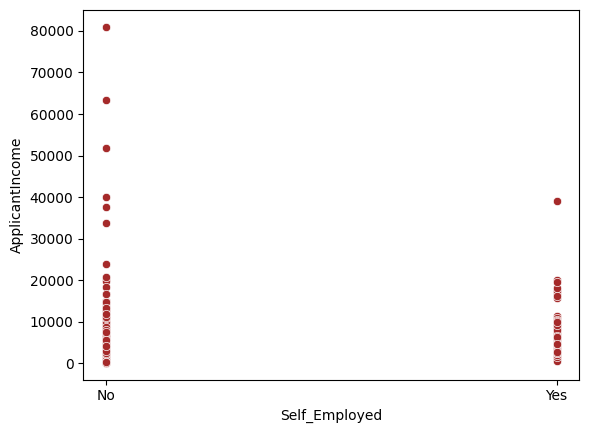

In [9]:
sns.scatterplot(x='Self_Employed', y='ApplicantIncome', data=df, color='brown')

<Axes: xlabel='Credit_History', ylabel='Property_Area'>

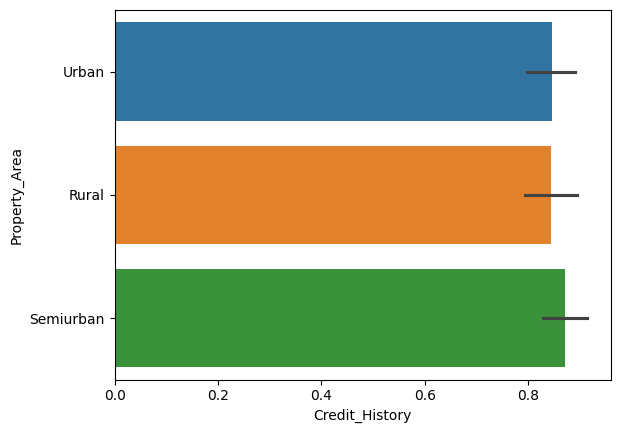

In [10]:
sns.barplot(x='Credit_History',y='Property_Area', data=df, hue='Property_Area')

<Axes: xlabel='Dependents', ylabel='Loan_Amount_Term'>

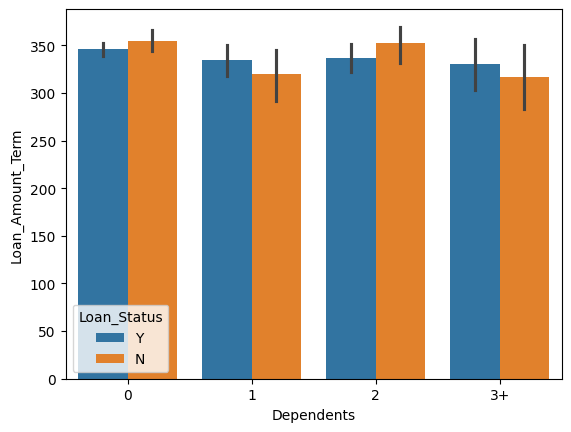

In [11]:
sns.barplot(x='Dependents',y='Loan_Amount_Term', data=df, hue='Loan_Status')

<Axes: xlabel='Credit_History', ylabel='Property_Area'>

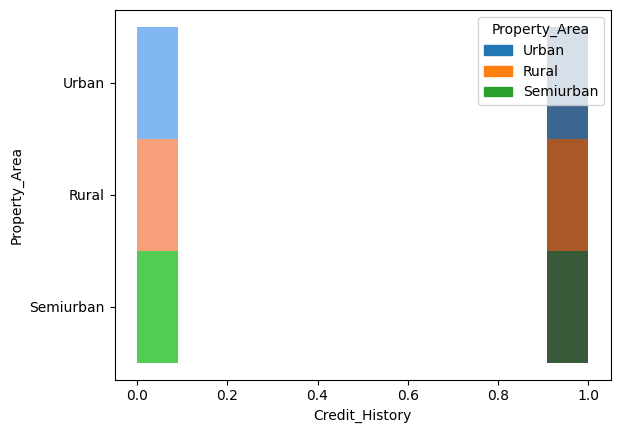

In [12]:
sns.histplot(x='Credit_History',y='Property_Area', data=df, hue='Property_Area')

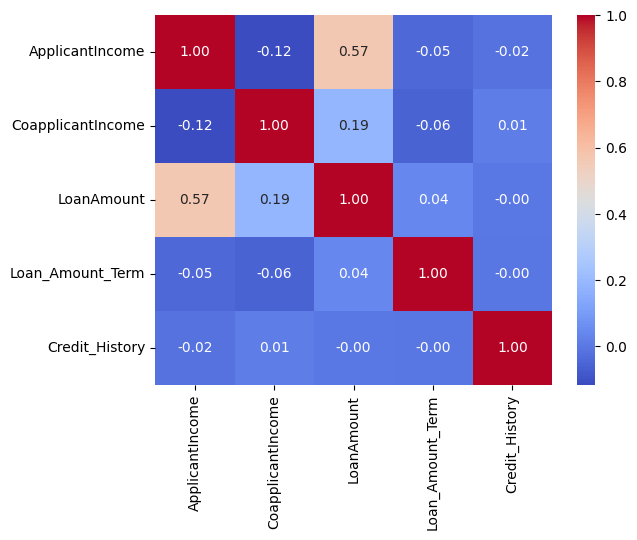

In [5]:
columns_of_interest = [
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History'
]
# Create a subset DataFrame with the specified columns
subset_df = df[columns_of_interest]
correlation_matrix = subset_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # .2f for upto 2 decimal places
plt.show()

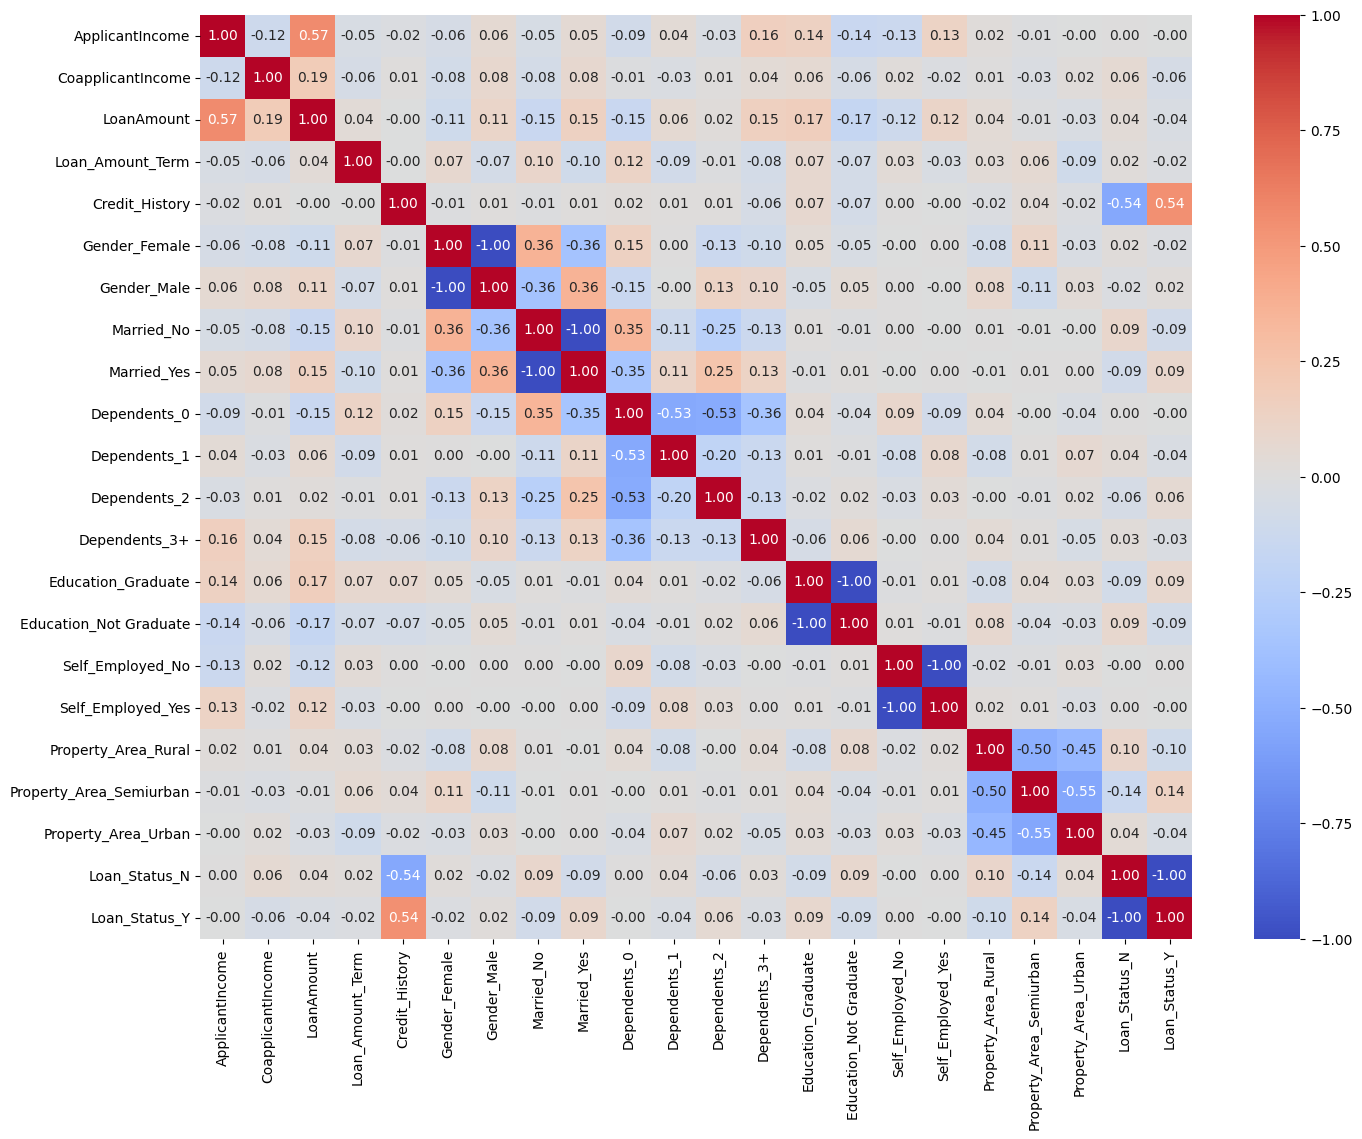

In [6]:
# Drop the Loan_ID column as it is not useful for correlation analysis
df.drop(columns=['Loan_ID'], inplace=True)

# List of non-numeric columns to convert bcz we want see corelation matrix of non num also!!!!!!!!!
non_numeric_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# One-hot encode the non-numeric columns
df_encoded = pd.get_dummies(df, columns=non_numeric_columns)


correlation_matrix = df_encoded.corr()


plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # .2f for up to 2 decimal places
plt.show()

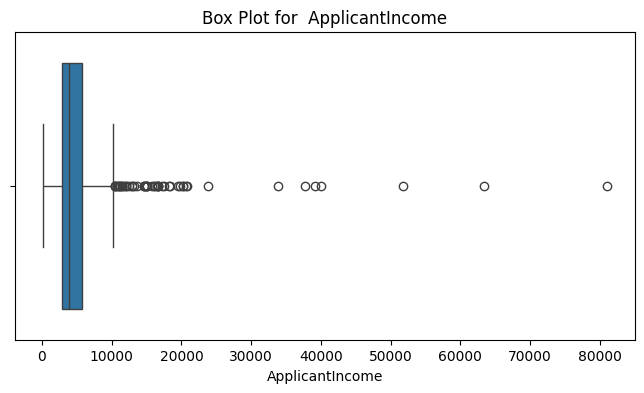

In [7]:
#columns_to_visualize = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
plt.figure(figsize=(8, 4))
sns.boxplot(x='ApplicantIncome', data=df)
plt.title('Box Plot for  ApplicantIncome')
plt.show()

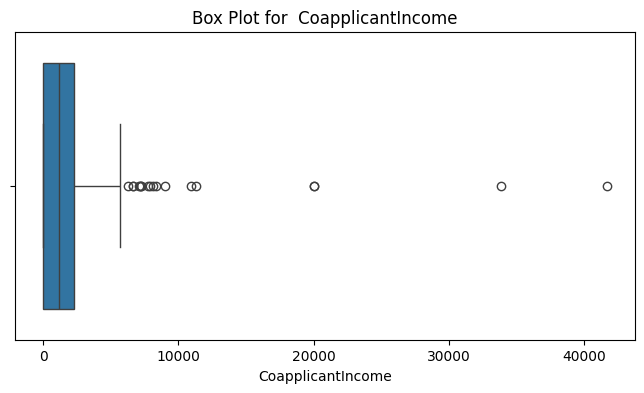

In [8]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='CoapplicantIncome', data=df)
plt.title('Box Plot for  CoapplicantIncome')
plt.show()

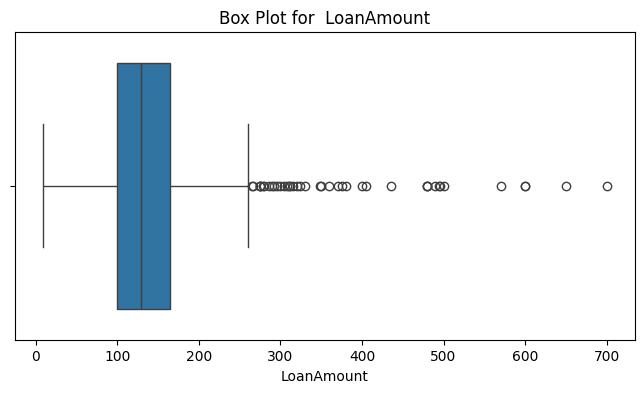

In [9]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='LoanAmount', data=df)
plt.title('Box Plot for  LoanAmount')
plt.show()

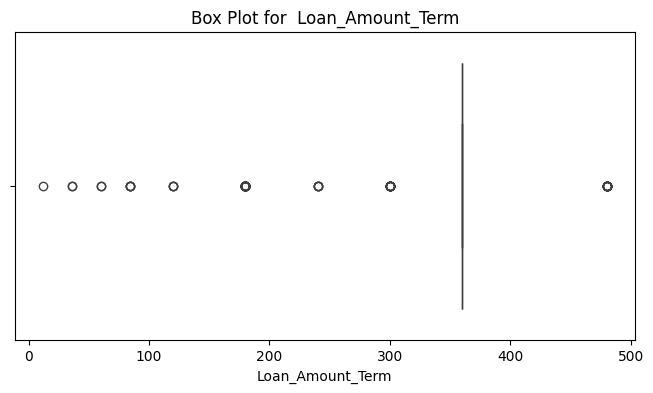

In [10]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Loan_Amount_Term', data=df)
plt.title('Box Plot for  Loan_Amount_Term')
plt.show()

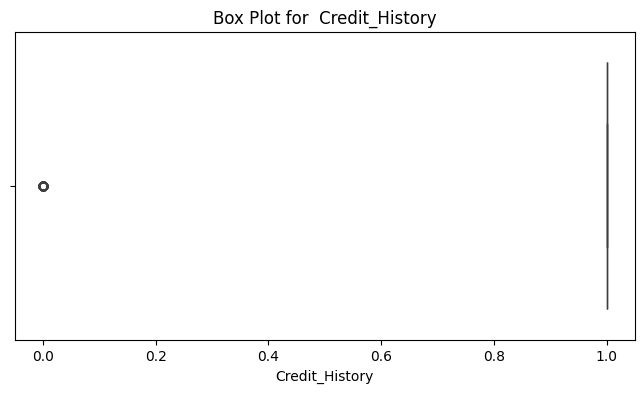

In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Credit_History', data=df)
plt.title('Box Plot for  Credit_History')
plt.show()

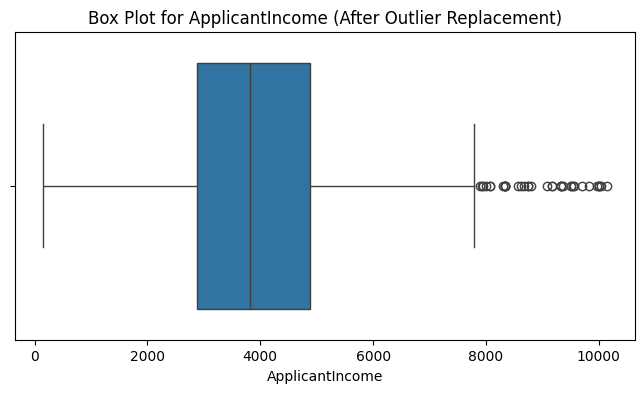

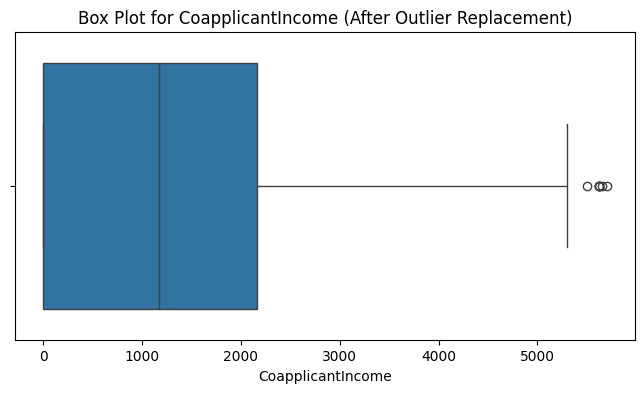

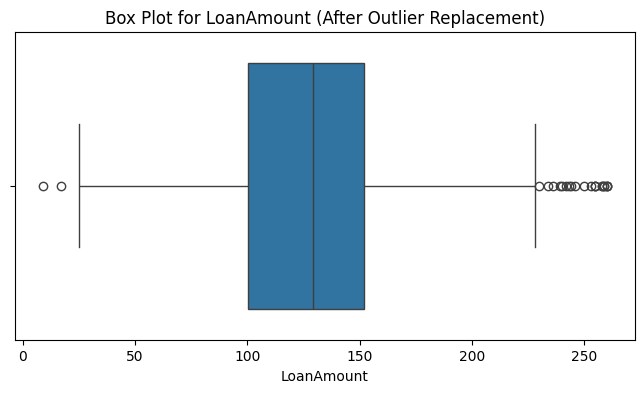

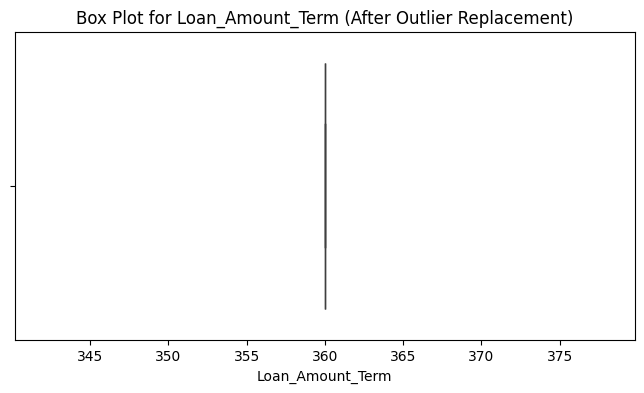

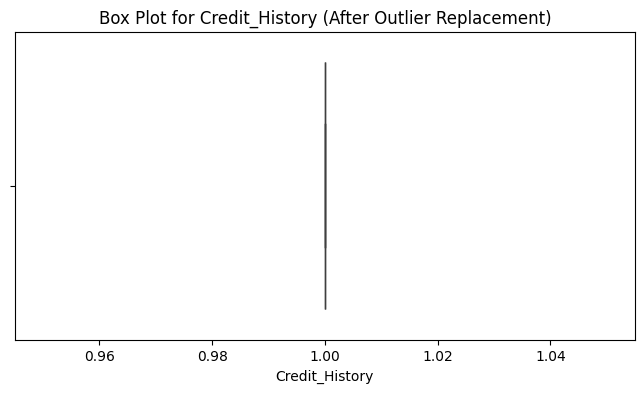

In [12]:
import numpy as np

# Function to replace outliers
def replace_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with median of the column
    median = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])

# List of columns to check for outliers
columns_to_check = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Apply the function to each column
for column in columns_to_check:
    replace_outliers(df, column)

# Verify the changes by plotting the boxplots again
for column in columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column} (After Outlier Replacement)')
    plt.show()


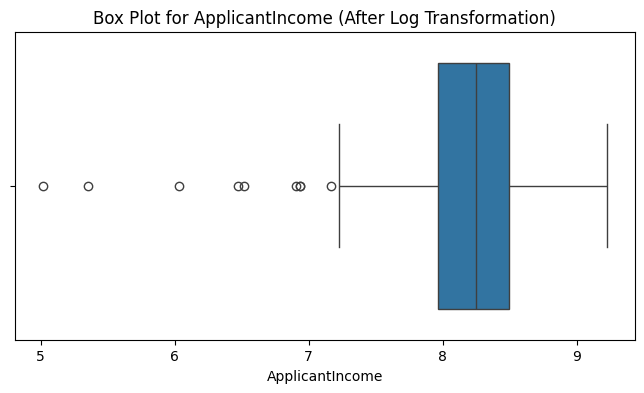

In [13]:
df['ApplicantIncome'] = np.log1p(df['ApplicantIncome'])  # log1p is used to handle log(0) cases

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['ApplicantIncome'])
plt.title('Box Plot for ApplicantIncome (After Log Transformation)')
plt.show()


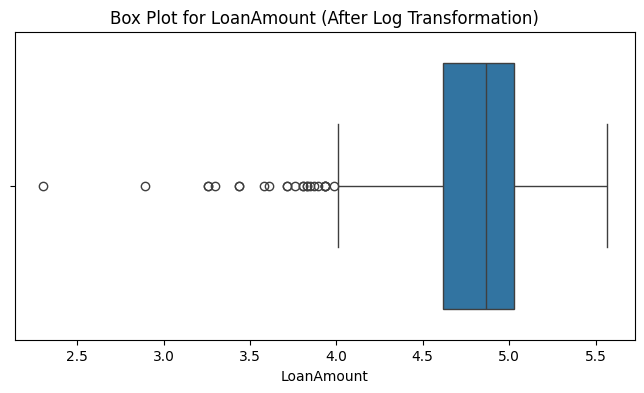

In [14]:
df['LoanAmount'] = np.log1p(df['LoanAmount'])  # log1p is used to handle log(0) cases

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['LoanAmount'])
plt.title('Box Plot for LoanAmount (After Log Transformation)')
plt.show()


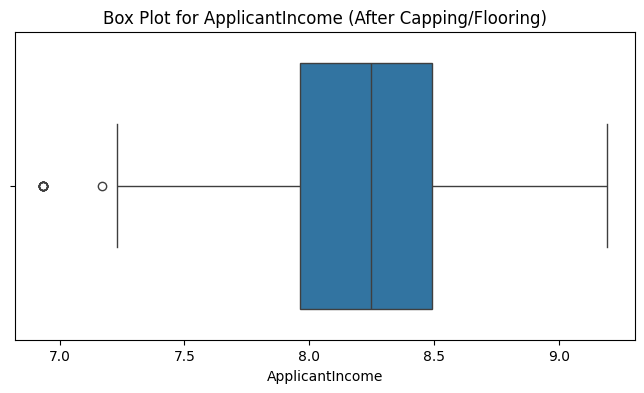

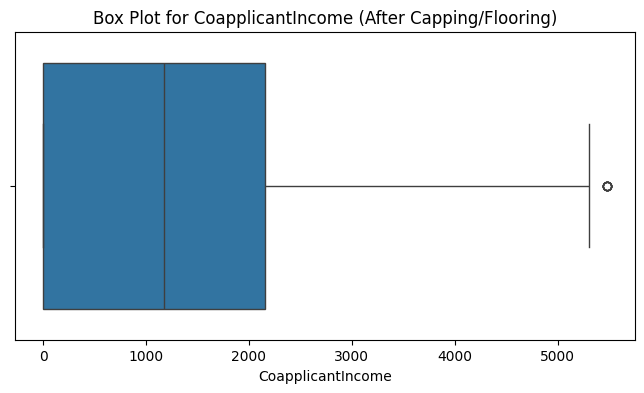

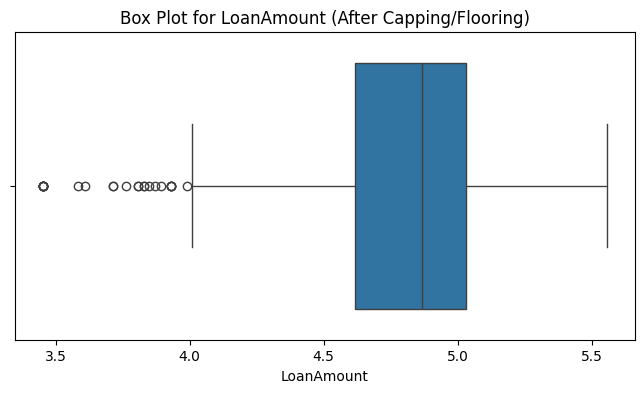

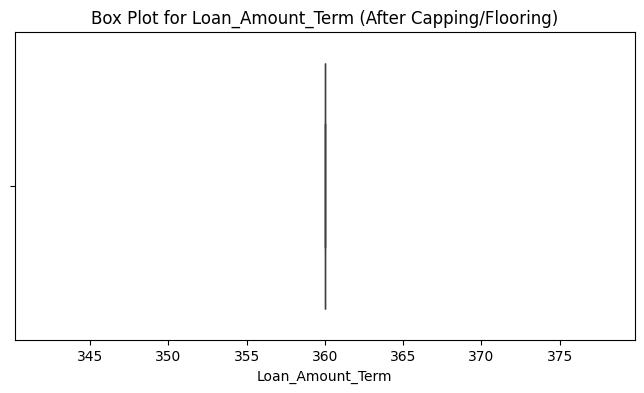

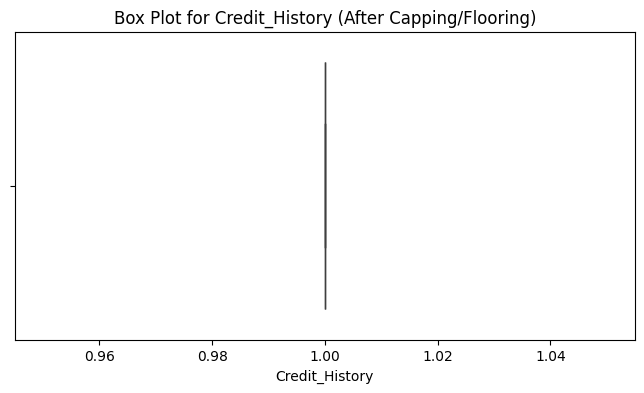

In [15]:
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply capping to the columns
for column in columns_to_check:
    cap_outliers(df, column)

# Verify the changes by plotting the boxplots again
for column in columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column} (After Capping/Flooring)')
    plt.show()


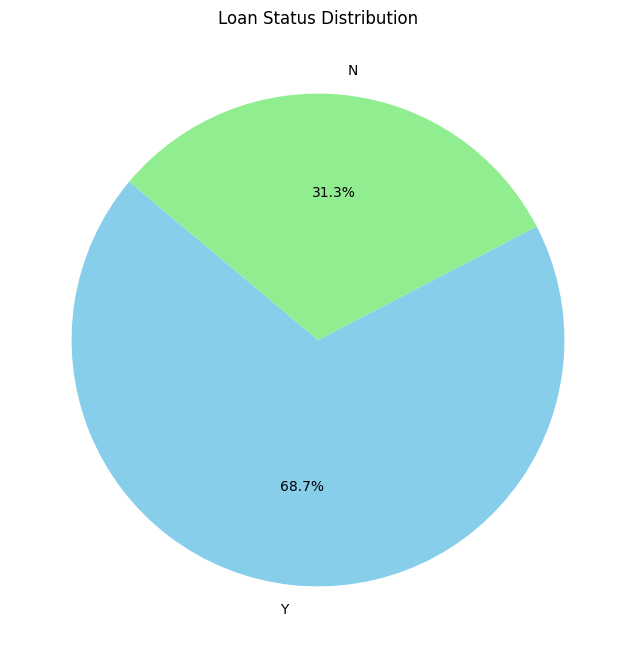

In [16]:
data = df['Loan_Status'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])

plt.title('Loan Status Distribution')

# Display the pie chart
plt.show()


In [17]:
from sklearn import preprocessing
normalized=preprocessing.normalize([df['ApplicantIncome']])
print(normalized)

normalized=preprocessing.normalize([df['CoapplicantIncome']])
print(normalized)

normalized=preprocessing.normalize([df['LoanAmount']])
print(normalized)

normalized=preprocessing.normalize([df['Loan_Amount_Term']])
print(normalized)



[[0.04249135 0.04129673 0.03922156 0.0384887  0.04261619 0.04211556
  0.03799024 0.03927998 0.04063773 0.04039527 0.03953761 0.03832877
  0.03933929 0.0368624  0.03512349 0.04167401 0.04010896 0.03999042
  0.04161128 0.03852082 0.04381251 0.04257932 0.03852082 0.03978382
  0.04027104 0.04489779 0.03888196 0.04089956 0.03563471 0.04031432
  0.04082953 0.03948684 0.04141185 0.03997645 0.04039527 0.03786697
  0.0367959  0.04020471 0.04082953 0.04031171 0.04011441 0.03672032
  0.03812888 0.04055762 0.04141498 0.03984887 0.04232095 0.04246785
  0.03860485 0.04063039 0.03705666 0.03935997 0.04090419 0.04133187
  0.04039527 0.03872011 0.0375491  0.03978527 0.04407396 0.03977216
  0.03832877 0.03926867 0.03853774 0.04166906 0.04082953 0.04238726
  0.03953761 0.04039527 0.04344067 0.04098457 0.03954983 0.03692018
  0.03997645 0.04147717 0.04197709 0.04031432 0.04031432 0.03396401
  0.03948684 0.03973703 0.04043812 0.03811867 0.03541248 0.04261619
  0.04061568 0.03805902 0.03973703 0.03832877 0.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


now for model to be trained, we have to convert object/float into int64

In [18]:
df_cleaned = df.copy() # Create copy of the original DF
df_cleaned.replace('Unknown', np.nan, inplace=True)

df=df_cleaned

In [19]:
from sklearn import preprocessing
df_cleaned = df.copy()


gender = preprocessing.LabelEncoder()
gender.fit(df_cleaned['Gender'].to_list())
df_cleaned['Gender'] = gender.transform(df_cleaned['Gender'].to_list())

m = preprocessing.LabelEncoder()
m.fit(df_cleaned['Married'].to_list())
df_cleaned['Married'] = m.transform(df_cleaned['Married'].to_list())

dep = preprocessing.LabelEncoder()
dep.fit(df_cleaned['Dependents'].to_list())
df_cleaned['Dependents'] = dep.transform(df_cleaned['Dependents'].to_list())

edu = preprocessing.LabelEncoder()
edu.fit(df_cleaned['Education'].to_list())
df_cleaned['Education'] = edu.transform(df_cleaned['Education'].to_list())

sel = preprocessing.LabelEncoder()
sel.fit(df_cleaned['Self_Employed'].to_list())
df_cleaned['Self_Employed'] = sel.transform(df_cleaned['Self_Employed'].to_list())

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [21]:
import pandas as pd
from sklearn import preprocessing



# Make a copy of the DataFrame
df_cleaned = df.copy()

# List of columns to encode
columns_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Encoding each column
for column in columns_to_encode:
    if column in df_cleaned.columns:
        # Handle missing values
        df_cleaned[column].fillna('Unknown', inplace=True)

        # Initialize LabelEncoder
        le = preprocessing.LabelEncoder()

        # Fit and transform the column
        df_cleaned[column] = le.fit_transform(df_cleaned[column])
    else:
        print(f"Column '{column}' does not exist in the DataFrame")

# Convert the float columns to int64
float_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for column in float_columns:
    df_cleaned[column] = df_cleaned[column].astype('int64')

# Check the data types of the encoded columns
print(df_cleaned.dtypes)

# Display DataFrame info
df_cleaned.info()


Gender               int64
Married              int64
Dependents           int64
Education            int64
Self_Employed        int64
ApplicantIncome      int64
CoapplicantIncome    int64
LoanAmount           int64
Loan_Amount_Term     int64
Credit_History       int64
Property_Area        int64
Loan_Status          int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int64
 1   Married            614 non-null    int64
 2   Dependents         614 non-null    int64
 3   Education          614 non-null    int64
 4   Self_Employed      614 non-null    int64
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  

In [22]:
#import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.linear_model import LogisticRegression

In [98]:
X = df_cleaned.drop(columns=['Loan_Status'])  # Drop the target column
y = df_cleaned['Loan_Status']  # Target column

y = y.map({'N': 0, 'Y': 1})

KeyError: "['Loan_Status'] not found in axis"

In [99]:
#y_train.dropna(inplace=True)

In [100]:
#y_train.isnull().sum()

0

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7837837837837838
Precision: 0.7564102564102564
Recall: 0.9833333333333333
F1-score: 0.8550724637681159


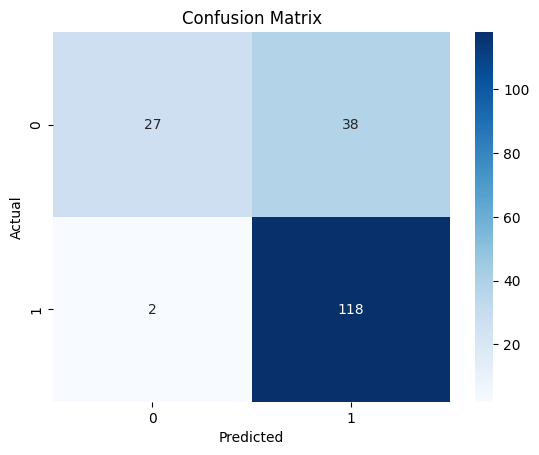

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv("trainingdata.csv", encoding = 'unicode_escape')

# Handle missing values
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'])

# Split the dataset into features and target
X = df.drop(columns=['Loan_Status_N', 'Loan_Status_Y'])
y = df['Loan_Status_Y']

# Drop the Loan_ID column
X = X.drop('Loan_ID', axis=1)
#X_train = X_train.drop('Loan_ID', axis=1)
#X_test = X_test.drop('Loan_ID', axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
df.head(1)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,LP001002,5849,0.0,146.412162,360.0,1.0,False,True,True,False,...,False,True,False,True,False,False,False,True,False,True


In [39]:
#columns increased ---> because of 1 hot encoding
new_data = pd.DataFrame({
    'ApplicantIncome': [0],
    'CoapplicantIncome': [0],
    'Credit_History': [1],
    'Dependents_0': [1],
    'Dependents_1': [0],
    'Dependents_2': [0],
    'Dependents_3+': [0],
    'Education_Graduate': [1],
    'Education_Not Graduate': [0],
    'Gender_Male': [1],
    'Gender_Female': [0],
    'Married_Yes': [1],
    'Married_No': [0],
    'Property_Area_Urban': [1],
    'Property_Area_Rural': [0],
    'Property_Area_Semiurban': [0],
    'Self_Employed_No': [1],
    'Self_Employed_Yes': [0],
    'LoanAmount': [5000],
    'Loan_Amount_Term': [360],
}, columns=logistic_model.feature_names_in_)
# Make a prediction
y_pred = logistic_model.predict(new_data)

# Print the prediction
if y_pred[0] == 1:
    print("congrats!!! your loan is approved.")
else:
    print("hey there!! unfortunately,The loan is not approved.")

hey there!! unfortunately,The loan is not approved.


In [41]:
#columns increased ---> because of 1 hot encoding
new_data = pd.DataFrame({
    'ApplicantIncome': [1],
    'CoapplicantIncome': [1],
    'Credit_History': [1],
    'Dependents_0': [0],
    'Dependents_1': [0],
    'Dependents_2': [0],
    'Dependents_3+': [0],
    'Education_Graduate': [1],
    'Education_Not Graduate': [0],
    'Gender_Male': [1],
    'Gender_Female': [0],
    'Married_Yes': [1],
    'Married_No': [0],
    'Property_Area_Urban': [1],
    'Property_Area_Rural': [1],
    'Property_Area_Semiurban': [0],
    'Self_Employed_No': [0],
    'Self_Employed_Yes': [1],
    'LoanAmount': [1200],
    'Loan_Amount_Term': [360],
}, columns=logistic_model.feature_names_in_)
# Make a prediction
y_pred = logistic_model.predict(new_data)

# Print the prediction
if y_pred[0] == 1:
    print("congrats!!! your loan is approved.")
else:
    print("hey there!! unfortunately,The loan is not approved.")

congrats!!! your loan is approved.


Accuracy: 0.7675675675675676
Precision: 0.7583892617449665
Recall: 0.9416666666666667
F1-score: 0.8401486988847583
Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.45      0.57        65
        True       0.76      0.94      0.84       120

    accuracy                           0.77       185
   macro avg       0.78      0.69      0.71       185
weighted avg       0.77      0.77      0.75       185



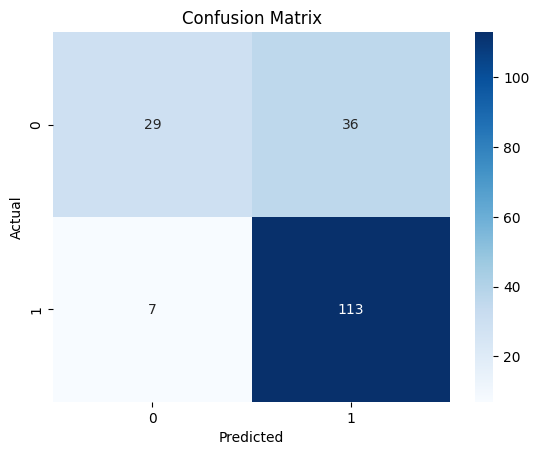

In [45]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) #100 deicision tree combination

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
#columns increased ---> because of 1 hot encoding
new_data = pd.DataFrame({
    'ApplicantIncome': [1],
    'CoapplicantIncome': [1],
    'Credit_History': [1],
    'Dependents_0': [0],
    'Dependents_1': [0],
    'Dependents_2': [0],
    'Dependents_3+': [0],
    'Education_Graduate': [1],
    'Education_Not Graduate': [0],
    'Gender_Male': [1],
    'Gender_Female': [0],
    'Married_Yes': [1],
    'Married_No': [0],
    'Property_Area_Urban': [1],
    'Property_Area_Rural': [1],
    'Property_Area_Semiurban': [0],
    'Self_Employed_No': [0],
    'Self_Employed_Yes': [1],
    'LoanAmount': [1200],
    'Loan_Amount_Term': [360],
}, columns=rf_model.feature_names_in_)
# Make a prediction
y_pred = rf_model.predict(new_data)

# Print the prediction
if y_pred[0] == 1:
    print("congrats!!! your loan is approved.")
else:
    print("hey there!! unfortunately,The loan is not approved.")

congrats!!! your loan is approved.


In [48]:
#columns increased ---> because of 1 hot encoding
new_data = pd.DataFrame({
    'ApplicantIncome': [0],
    'CoapplicantIncome': [0],
    'Credit_History': [1],
    'Dependents_0': [1],
    'Dependents_1': [0],
    'Dependents_2': [0],
    'Dependents_3+': [0],
    'Education_Graduate': [1],
    'Education_Not Graduate': [0],
    'Gender_Male': [1],
    'Gender_Female': [0],
    'Married_Yes': [1],
    'Married_No': [0],
    'Property_Area_Urban': [1],
    'Property_Area_Rural': [0],
    'Property_Area_Semiurban': [0],
    'Self_Employed_No': [1],
    'Self_Employed_Yes': [0],
    'LoanAmount': [5000],
    'Loan_Amount_Term': [360],
}, columns=rf_model.feature_names_in_)
# Make a prediction
y_pred = rf_model.predict(new_data)

# Print the prediction
if y_pred[0] == 1:
    print("congrats!!! your loan is approved.")
else:
    print("hey there!! unfortunately,The loan is not approved.")

hey there!! unfortunately,The loan is not approved.
